<a href="https://colab.research.google.com/github/wahyudi0018/ML_Ganjil_2024/blob/main/Jobsheet11_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Wahyudi**

**Kelas : TI-3C**

**No. Absen : 26**

Untuk detail kode dan dokumentasi lebih lanjut, kunjungi [repository GitHub](https://github.com/wahyudi0018/ML_Ganjil_2024/blob/main/Jobsheet11_ML.ipynb).

# **Praktikum 1**
Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

## Langkah 1 - Import Library

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Langkah 2 - Pra Pengolahan Data

### Langkah 2.1. Pra Pengolahan Data Training

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN

### Langkah 3.1.  - Inisiasi Model CNN

In [8]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Langkah 3.3 - Pembuatan Layer Pooling 1

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Langkah 4 - Fit CNN

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 23s 88ms/step - loss: 0.6755 - accuracy: 0.5804 - val_loss: 0.7224 - val_accuracy: 0.5640
Epoch 2/25
250/250 [==============================] - 22s 89ms/step - loss: 0.6011 - accuracy: 0.6764 - val_loss: 0.5614 - val_accuracy: 0.7060
Epoch 3/25
250/250 [==============================] - 22s 86ms/step - loss: 0.5607 - accuracy: 0.7111 - val_loss: 0.5231 - val_accuracy: 0.7450
Epoch 4/25
250/250 [==============================] - 22s 87ms/step - loss: 0.5286 - accuracy: 0.7351 - val_loss: 0.5330 - val_accuracy: 0.7315
Epoch 5/25
250/250 [==============================] - 22s 87ms/step - loss: 0.5037 - accuracy: 0.7483 - val_loss: 0.5135 - val_accuracy: 0.7450
Epoch 6/25
250/250 [==============================] - 22s 88ms/step - loss: 0.4871 - accuracy: 0.7682 - val_loss: 0.4880 - val_accuracy: 0.7650
Epoch 7/25
250/250 [==============================] - 22s 86ms/step - loss: 0.4701 - accuracy: 0.7714 - val_loss: 0.4748 - val_accuracy:

## Langkah 5 - Prediksi dengan 1 Citra

In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 26ms/step
dog


# Praktikum 2
Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

## Langkah 1 - Load Library

In [19]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Langkah 2 - Unduh Dataset CIFAR

In [20]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


## Langkah 3 - Verifikasi Data

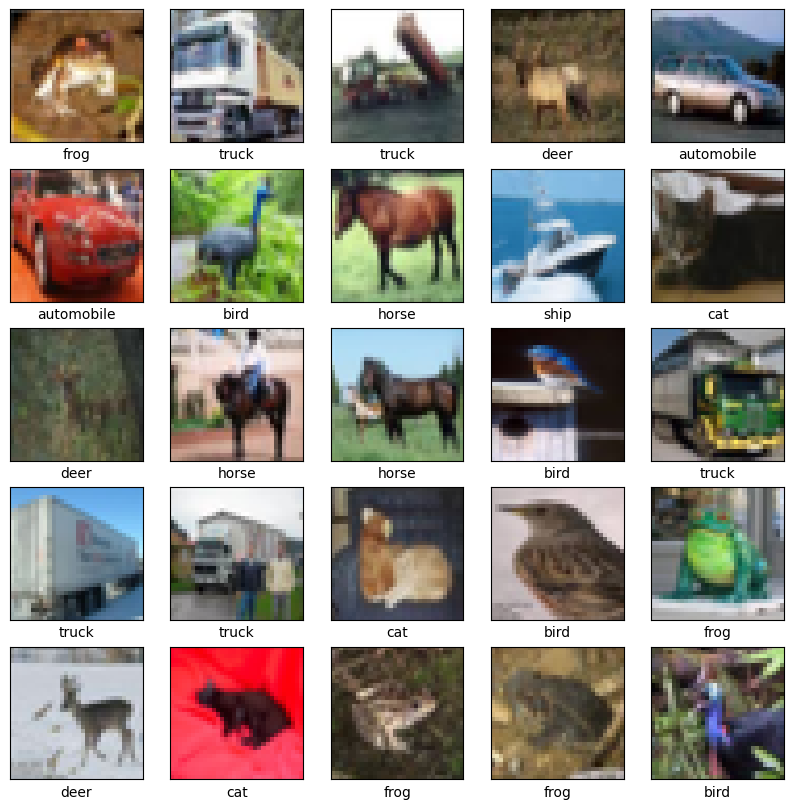

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
     # The CIFAR labels happen to be arrays,
     # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Langkah 4 - Buat Model CNN

### Langkah 4.1. - Buat Layer Konvolusi

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Langkah 4.2. - Cek Arsitektur Konvolusi

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

### Langkah 4.3. - Tambahkan Layer Fully Connected

In [24]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Langkah 4.4. - Cek Arsitektur Model CNN

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

### Langkah 4.5. - Compile Model CNN

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Langkah 5 - Fit Model

In [27]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5692 - accuracy: 0.4273 - val_loss: 1.3921 - val_accuracy: 0.5068
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2028 - accuracy: 0.5735 - val_loss: 1.0995 - val_accuracy: 0.6086
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0509 - accuracy: 0.6293 - val_loss: 1.0088 - val_accuracy: 0.6407
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9619 - accuracy: 0.6625 - val_loss: 0.9655 - val_accuracy: 0.6618
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8993 - accuracy: 0.6842 - val_loss: 0.9442 - val_accuracy: 0.6757
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8403 - accuracy: 0.7043 - val_loss: 0.9173 - val_accuracy: 0.6781
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7922 - accuracy: 0.7206 - val_loss: 0.9117 - val_ac

## Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.8685 - accuracy: 0.7068 - 1s/epoch - 3ms/step


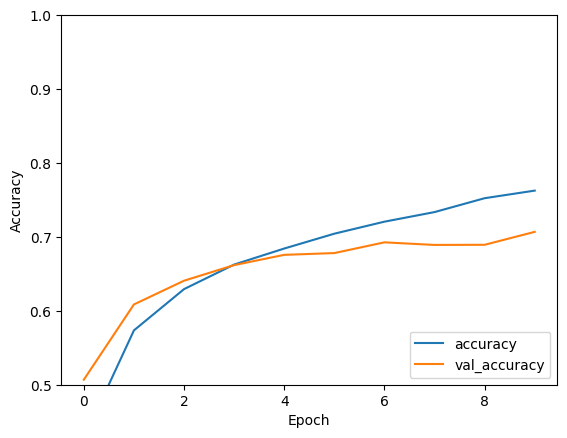

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## Langkah 7 - Cetak Hasil Akurasi

In [29]:
print(test_acc)

0.7067999839782715


# Tugas 1
Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

## Langkah 1 - Load Library

In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Langkah 2 - Load dan preprocessing data CIFAR-10

In [31]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Langkah 3 - Normalisasi gambar ke rentang [0, 1]

In [32]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Langkah 4 - Augmentasi data

In [33]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),  # Membalik gambar secara horizontal
    layers.RandomRotation(0.1),      # Rotasi acak dengan sudut maksimal 10%
    layers.RandomZoom(0.1),          # Zoom acak sebesar 10%
])

## Langkah 5 - Membangun model CNN


In [42]:
model = models.Sequential([

    # Lapisan augmentasi data
    data_augmentation,

    # Blok Konvolusi Pertama
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),  # Lapisan konvolusi pertama
    layers.BatchNormalization(),  # Normalisasi batch untuk mempercepat konvergensi
    layers.Activation('relu'),    # Fungsi aktivasi ReLU
    layers.Conv2D(32, (3, 3), padding='same'),  # Lapisan konvolusi kedua
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),  # Pooling untuk mengurangi dimensi
    layers.Dropout(0.25),         # Dropout untuk mencegah overfitting

    # Blok Konvolusi Kedua
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Blok Konvolusi Ketiga
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Lapisan Dense untuk klasifikasi
    layers.Flatten(),             # Meratakan hasil fitur map menjadi 1 dimensi
    layers.Dense(512),            # Lapisan dense dengan 512 neuron
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10)              # Output untuk 10 kelas (CIFAR-10)
])

# Kompilasi model dengan optimisasi dan fungsi loss
# Menggunakan learning rate scheduling untuk mengatur learning rate secara dinamis
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Fungsi loss untuk klasifikasi
    metrics=['accuracy']  # Mengukur akurasi selama pelatihan
)

# Tambahkan callback untuk meningkatkan pelatihan
callbacks = [
    # Early stopping untuk menghentikan pelatihan jika tidak ada peningkatan
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    # Reduce learning rate saat loss validasi stagnan
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )
]

# Melatih model dengan data pelatihan
history = model.fit(
    train_images,
    train_labels,
    epochs=30,  # Jumlah epoch pelatihan
    validation_data=(test_images, test_labels),  # Data validasi
    batch_size=64,  # Ukuran batch
    callbacks=callbacks  # Menggunakan callback
)

Epoch 1/30
782/782 [==============================] - 63s 76ms/step - loss: 1.6480 - accuracy: 0.4208 - val_loss: 1.5776 - val_accuracy: 0.4718 - lr: 0.0010
Epoch 2/30
782/782 [==============================] - 59s 75ms/step - loss: 1.2514 - accuracy: 0.5508 - val_loss: 1.3124 - val_accuracy: 0.5419 - lr: 9.0000e-04
Epoch 3/30
782/782 [==============================] - 60s 77ms/step - loss: 1.0907 - accuracy: 0.6128 - val_loss: 0.9326 - val_accuracy: 0.6765 - lr: 8.1000e-04
Epoch 4/30
782/782 [==============================] - 60s 77ms/step - loss: 1.0058 - accuracy: 0.6451 - val_loss: 1.0312 - val_accuracy: 0.6424 - lr: 7.2900e-04
Epoch 5/30
782/782 [==============================] - 59s 76ms/step - loss: 0.9401 - accuracy: 0.6694 - val_loss: 0.8706 - val_accuracy: 0.6954 - lr: 7.2900e-04
Epoch 6/30
782/782 [==============================] - 59s 76ms/step - loss: 0.8918 - accuracy: 0.6876 - val_loss: 0.8288 - val_accuracy: 0.7121 - lr: 6.5610e-04
Epoch 7/30
782/782 [==================

## Langkah 6 - Visualisasi hasil pelatihan

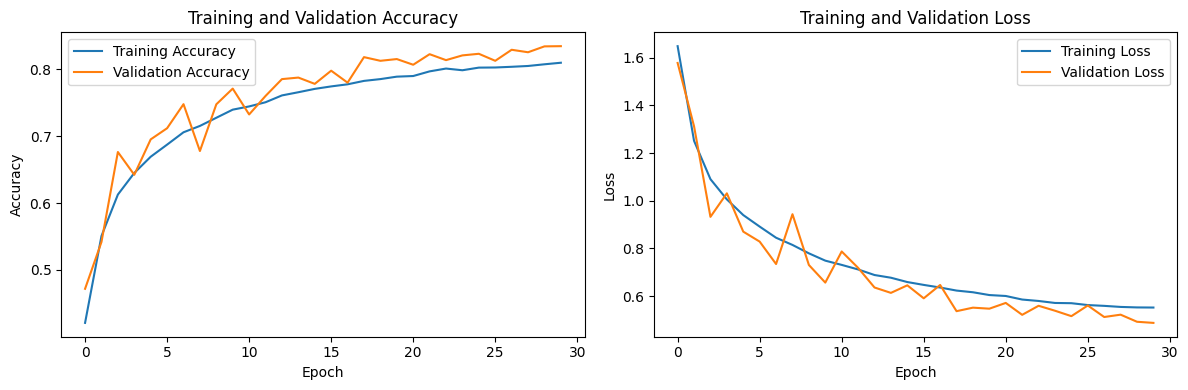

In [43]:
plt.figure(figsize=(12, 4))

# Grafik akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Grafik loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Langkah 7 - Tes akurasi

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 4s - loss: 0.4881 - accuracy: 0.8349 - 4s/epoch - 12ms/step
Test accuracy: 0.8349000215530396


# Tugas 2
Buatlah model CNN untuk klasifikasi dataset MNIST.

## Langkah 1 - Load Library

In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Langkah 2 - Load dataset MNIST

In [46]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Langkah 3 - Normalisasi nilai piksel ke rentang [0, 1]

In [47]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## Langkah 4 - Tambahkan dimensi channel untuk kompatibilitas dengan CNN

In [48]:
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Nama kelas untuk angka (0-9)
class_names = [str(i) for i in range(10)]

## Langkah 5 - Visualisasi beberapa data pelatihan

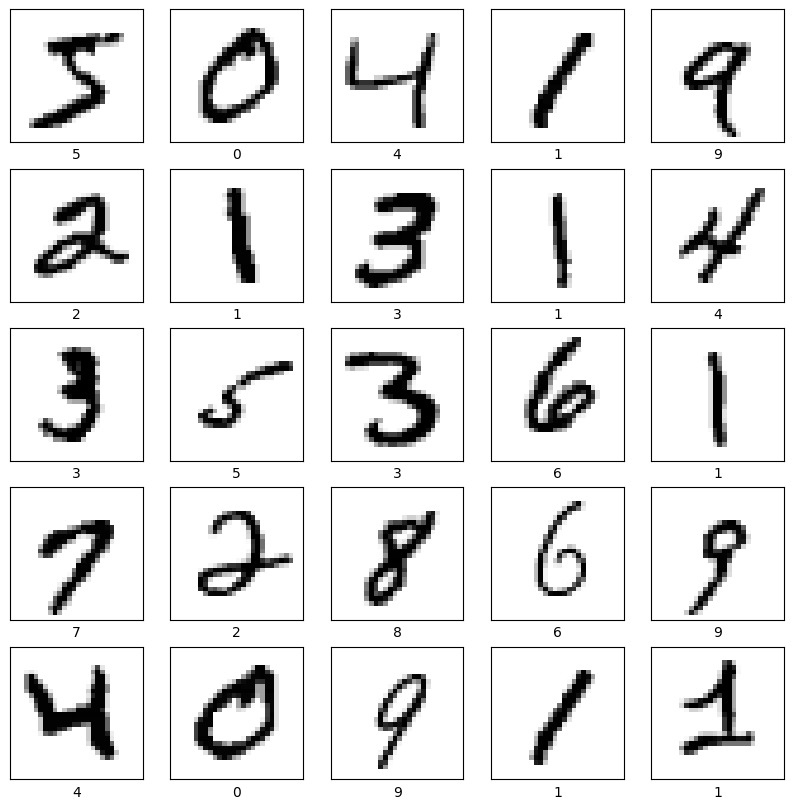

In [49]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # Menghapus tanda pada sumbu x
    plt.yticks([])  # Menghapus tanda pada sumbu y
    plt.grid(False) # Menghapus grid
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)  # Tampilkan gambar
    plt.xlabel(class_names[train_labels[i]])  # Label kelas pada gambar
plt.show()

## Langkah 6 - Membangun model CNN

In [50]:
model = models.Sequential([
    # Lapisan konvolusi pertama dengan 32 filter dan ukuran kernel 3x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  # Pooling untuk mengurangi dimensi fitur

    # Lapisan konvolusi kedua dengan 64 filter
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Lapisan Flatten untuk mengubah data 2D menjadi 1D
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Lapisan dense dengan 128 neuron
    layers.Dropout(0.5),  # Dropout untuk mencegah overfitting
    layers.Dense(10)  # Output untuk 10 kelas (0-9)
])

# Kompilasi model dengan optimizer Adam dan loss untuk klasifikasi
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Melatih model dengan data pelatihan dan validasi
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1987 - accuracy: 0.9400 - val_loss: 0.0489 - val_accuracy: 0.9845
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0727 - accuracy: 0.9784 - val_loss: 0.0352 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0537 - accuracy: 0.9839 - val_loss: 0.0305 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0451 - accuracy: 0.9862 - val_loss: 0.0261 - val_accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0226 - val_accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0258 - val_accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0278 - accuracy: 0.9907 - val_loss: 0.0281 - val_ac

## Langkah 7 - Visualisasi akurasi pelatihan dan validasi


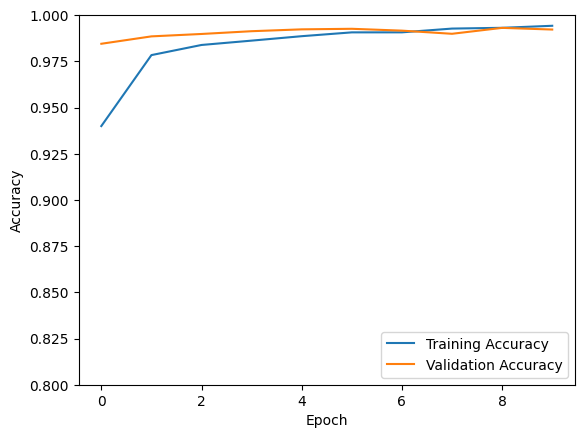

In [51]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])  # Batasi rentang y untuk fokus pada nilai tinggi
plt.legend(loc='lower right')
plt.show()

## Langkah 8 - Evaluasi model pada data pengujian


In [52]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.0301 - accuracy: 0.9922 - 922ms/epoch - 3ms/step
Test accuracy: 0.9922000169754028


## Langkah 9 - Prediksi beberapa gambar


313/313 [==============================] - 1s 3ms/step


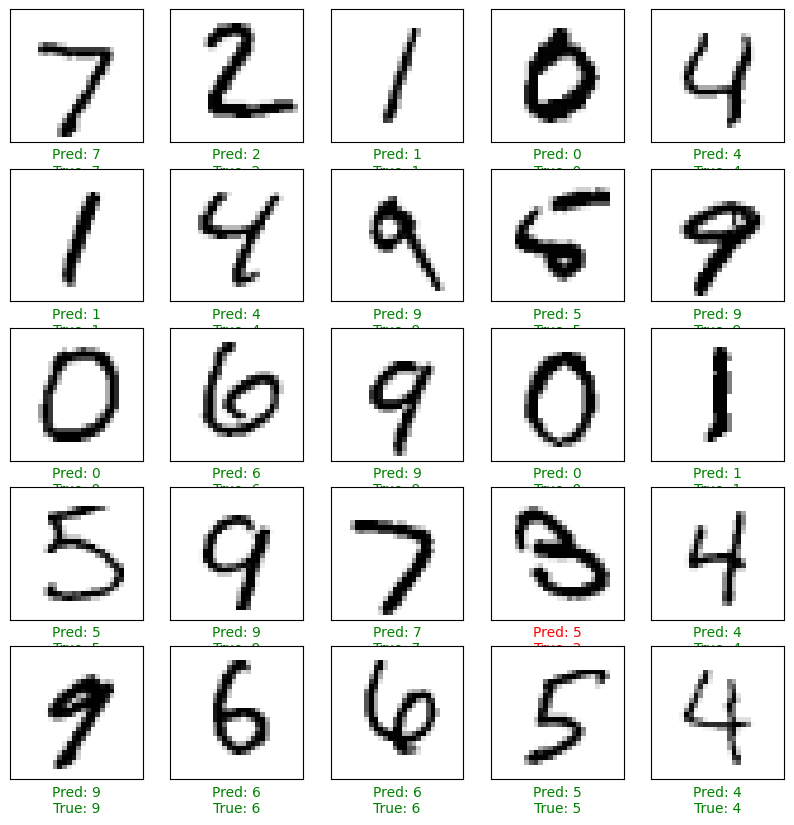

In [53]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Label prediksi berdasarkan probabilitas maksimum

# Visualisasi prediksi
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # Menghapus tanda pada sumbu x
    plt.yticks([])  # Menghapus tanda pada sumbu y
    plt.grid(False) # Menghapus grid
    plt.imshow(test_images[i].squeeze(), cmap=plt.cm.binary)  # Tampilkan gambar
    # Warna label hijau jika prediksi benar, merah jika salah
    color = 'green' if predicted_labels[i] == test_labels[i] else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}",
               color=color)
plt.show()